In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
df = pd.read_csv("megaGymDataset.csv")
df = df.rename(columns={'Unnamed: 0': 'index'})
df

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2913,2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1,Average
2914,2914,Lying Close-Grip Barbell Triceps Press To Chin,NaN,Strength,Triceps,E-Z Curl Bar,Beginner,8.1,Average
2915,2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN
2916,2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN


In [3]:
#Cheking if there is any NULL or missing values
df.isna().sum()

index            0
Title            0
Desc          1550
Type             0
BodyPart         0
Equipment        0
Level            0
Rating        1887
RatingDesc    2056
dtype: int64

In [4]:
# DATA ANALYSIS

# Some exercises has the same title - Should remove duplicates?
# df = df.drop_duplicates('Title', keep='last')
df['Title'].value_counts()

Seated Cable Rows                                3
Band-suspended kettlebell bench press            3
Exercise Ball Cable Crunch - Gethin Variation    2
Seated rear delt fly                             2
Dumbbell step-up                                 2
                                                ..
Close-grip hands-elevated push-up                1
Suspended push-up                                1
Push Up to Side Plank                            1
Isometric Chest Squeezes                         1
30 Arms EZ-Bar Skullcrusher                      1
Name: Title, Length: 2909, dtype: int64

<Axes: >

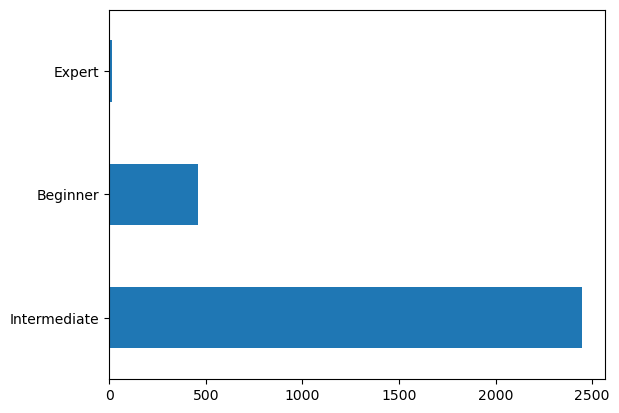

In [5]:
# Sorted bv level
df['Level'].value_counts().plot.barh()

<Axes: >

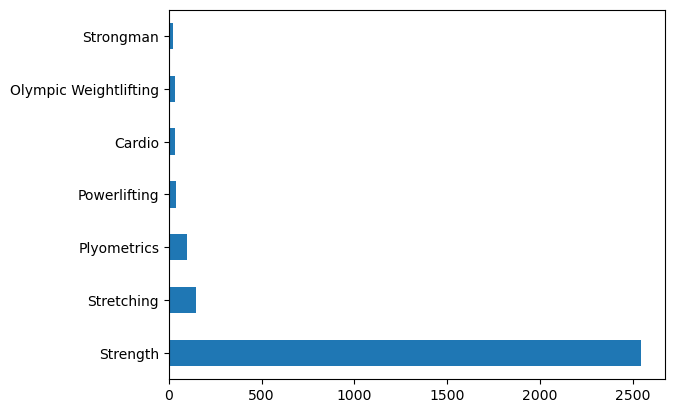

In [6]:
# sorted by type
df['Type'].value_counts().plot.barh()

<Axes: >

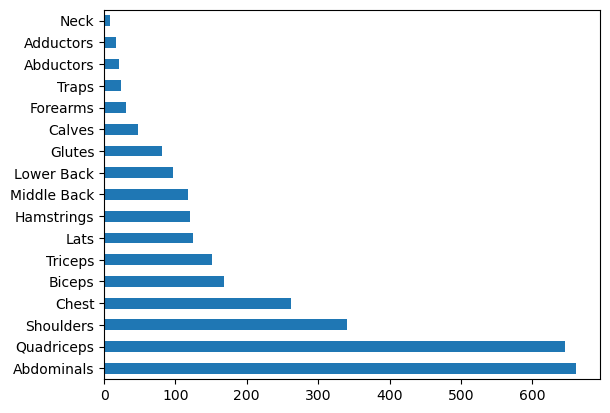

In [7]:
# sorted by bodypart
df['BodyPart'].value_counts().plot.barh()

In [8]:
# top rated exercises
ratingSorted= df.sort_values(by='Rating',ascending=False)
ratingSorted =ratingSorted.head(10)
ratingSorted

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
2065,2065,Single-Leg Press,The single-leg leg press is an exercise target...,Strength,Quadriceps,Machine,Intermediate,9.6,Average
1195,1195,Rickshaw Carry,NaN,Strongman,Forearms,Other,Beginner,9.6,Average
1179,1179,Palms-down wrist curl over bench,The palms-down wrist curl over bench is an exe...,Strength,Forearms,Barbell,Intermediate,9.5,Average
2525,2525,Dumbbell front raise to lateral raise,The dumbbell front raise to lateral raise is a...,Strength,Shoulders,Dumbbell,Intermediate,9.5,Average
1577,1577,Atlas Stones,NaN,Strongman,Lower Back,Other,Intermediate,9.5,Average
731,731,Incline Hammer Curls,NaN,Strength,Biceps,Dumbbell,Beginner,9.5,Average
88,88,Landmine twist,The landmine twist is a rotational abdominal m...,Strength,Abdominals,Other,Intermediate,9.5,Average
1798,1798,Clean from Blocks,NaN,Olympic Weightlifting,Quadriceps,Barbell,Beginner,9.5,Average
1451,1451,Weighted pull-up,The weighted pull-up is a more advanced variat...,Strength,Lats,Other,Intermediate,9.5,Average
1695,1695,T-Bar Row with Handle,NaN,Strength,Middle Back,Other,Intermediate,9.5,Average


In [9]:
# Prints the row of the given Title to find the index
print(df[df["Title"] == "Bench press"])
df.loc[df['Title'] == "Bench press", 'Rating'] = 10
print(df[df["Title"] == "Bench press"])

     index        Title                                               Desc  \
942    942  Bench press  The bench press is a popular barbell exercise ...   

         Type BodyPart Equipment         Level  Rating RatingDesc  
942  Strength    Chest   Barbell  Intermediate     NaN        NaN  
     index        Title                                               Desc  \
942    942  Bench press  The bench press is a popular barbell exercise ...   

         Type BodyPart Equipment         Level  Rating RatingDesc  
942  Strength    Chest   Barbell  Intermediate    10.0        NaN  


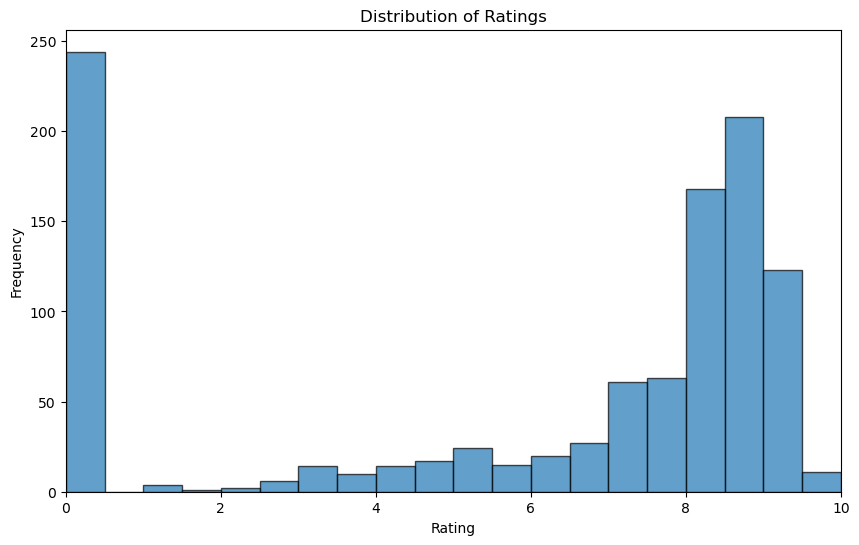

In [10]:
df_sorted = df.sort_values(by="Rating")
# Create a histogram of the "Ratings" column
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create a histogram of the "Ratings" column
plt.hist(df_sorted["Rating"], bins=20, edgecolor="k", alpha=0.7)

plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(False)
plt.xlim(df_sorted["Rating"].min(), df_sorted["Rating"].max())
plt.ylim(0, plt.gca().get_ylim()[1])
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from copy import deepcopy
import numpy as np

# Datasett for trening. Gjør om strenger til kategorier (int)
x = deepcopy(df)
x = x.drop(["Title"], axis = 1)
x = x.drop(["Desc"], axis = 1)
x = x.drop(["RatingDesc"], axis = 1)
x['Level'] = pd.factorize(x['Level'])[0]
x['Type'] = pd.factorize(x['Type'])[0]
x['BodyPart'] = pd.factorize(x['BodyPart'])[0]
x['Equipment'] = pd.factorize(x['Equipment'])[0]
x = x[x['Rating'].notna()]
x = x[df["Rating"] != 0]
# Verdier som skal predikeres, brukes for trening og testing
y = x["Rating"]
#y = y.round(0)
#y = y.astype(int)
x = x.drop(["Rating"], axis = 1)
#y=y.replace(0,1)
#y=y.replace(0.0,1)
#y=y.replace(np.nan,1)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

# Grid search for å finne beste params
from sklearn.model_selection import GridSearchCV
'''
param_grid = {
    'n_neighbors': [3,5,7,9,11,13,15,17],
    'p': [1, 2]
}
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
params = grid_search.best_params_
'''
param_grid = {
    'n_neighbors': [3,5,7,9,11,13,15,17],
    'p': [1, 2]
}
grid_search = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
params = grid_search.best_params_
print(params)

# Traiing
knn = KNeighborsRegressor(n_neighbors = params['n_neighbors'], p = params["p"])
knn.fit(X_train, y_train)


# Ny variabel X. Alle rader fra dataframe som ikke har rating
x = deepcopy(df)
# Ekskluderer øvelser med ratings
x = x[x["Rating"].isna()]

# Gjør om strenger til kategorier (int) for prediction
x = x.drop(["Rating"], axis = 1)
x = x.drop(["Title"], axis = 1)
x = x.drop(["Desc"], axis = 1)
x = x.drop(["RatingDesc"], axis = 1)
x['Level'] = pd.factorize(x['Level'])[0]
x['Type'] = pd.factorize(x['Type'])[0]
x['BodyPart'] = pd.factorize(x['BodyPart'])[0]
x['Equipment'] = pd.factorize(x['Equipment'])[0]

# Antall nonvalues
print("Nonvalues rating før:",df["Rating"].isna().sum())

# Predikerer en rating for hver rad i dataframe som ikke har rating
for index, row in x.iterrows():
    rating = knn.predict([row])
    #print(row["index"], rating)
    df.loc[df['index'] == index, 'Rating'] = rating

print("Nonvalues rating etter",df["Rating"].isna().sum())

filtered_df = df[df["Rating"] == 0]
print(len(filtered_df))

C:\Users\47467\AppData\Local\Temp\ipykernel_12240\1785574333.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = x[df["Rating"] != 0]
c:\Users\47467\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\47467\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\47467\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\47467\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return

{'n_neighbors': 3, 'p': 1}
Nonvalues rating før: 1886


c:\Users\47467\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\47467\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\47467\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\47467\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\47467\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\47467\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning

Nonvalues rating etter 0
244


c:\Users\47467\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\47467\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\47467\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\47467\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\47467\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\47467\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning

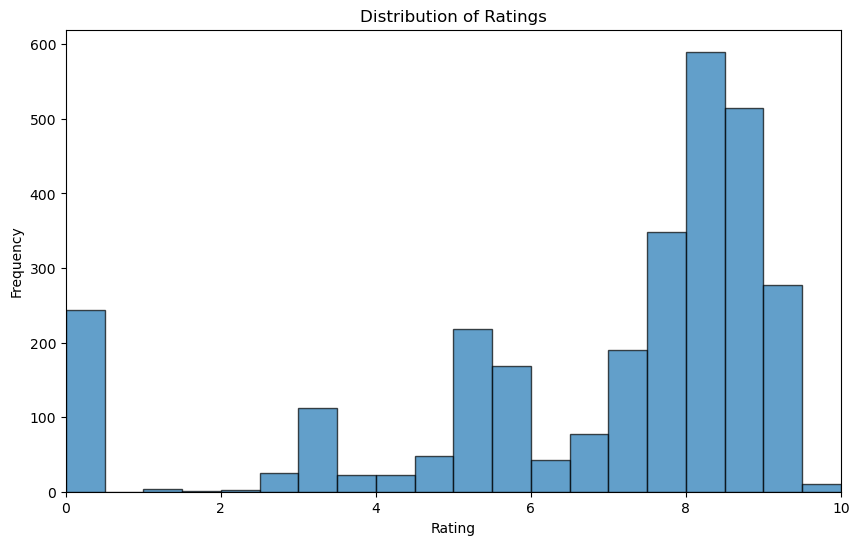

In [12]:
df_sorted = df.sort_values(by="Rating")
# Create a histogram of the "Ratings" column
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create a histogram of the "Ratings" column
plt.hist(df_sorted["Rating"], bins=20, edgecolor="k", alpha=0.7)

plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(False)
plt.xlim(df_sorted["Rating"].min(), df_sorted["Rating"].max())
plt.ylim(0, plt.gca().get_ylim()[1])
plt.show()

In [13]:
# Removing columns with lots of nonvalues
#df = df.drop('Rating', axis=1)
df = df.drop('RatingDesc', axis=1)
# Removing all rows containing nonvalues in description
df = df[df['Desc'].notna()]
#df = df[df['Rating'].notna()]
# Removing ID column
df.pop(df.columns[0])



0          0
1          1
2          2
3          3
4          4
        ... 
2911    2911
2912    2912
2913    2913
2915    2915
2916    2916
Name: index, Length: 1368, dtype: int64

In [14]:
# Checking datatypes
df.dtypes

Title         object
Desc          object
Type          object
BodyPart      object
Equipment     object
Level         object
Rating       float64
dtype: object

In [15]:
# Merging columns for cosign similarity and dropping excess columns
df["Merged"] = df["Type"].astype(str) + '|' + \
  df["BodyPart"].astype(str) + '|' + df["Equipment"].astype(str) + '|' + \
  df["Level"]

df = df.drop('Type', axis=1)
df = df.drop('BodyPart', axis=1)
df = df.drop('Equipment', axis=1)
df = df.drop('Level', axis=1)

In [16]:
# The merged columns
df["Merged"]

0           Strength|Abdominals|Bands|Intermediate
1           Strength|Abdominals|Bands|Intermediate
2           Strength|Abdominals|Bands|Intermediate
3           Strength|Abdominals|Bands|Intermediate
4           Strength|Abdominals|Bands|Intermediate
                           ...                    
2911    Strength|Triceps|E-Z Curl Bar|Intermediate
2912    Strength|Triceps|E-Z Curl Bar|Intermediate
2913    Strength|Triceps|E-Z Curl Bar|Intermediate
2915    Strength|Triceps|E-Z Curl Bar|Intermediate
2916    Strength|Triceps|E-Z Curl Bar|Intermediate
Name: Merged, Length: 1368, dtype: object

In [17]:
# Converting values of the merged column into vectors

from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
count_matrix = count.fit_transform(df.loc[:,"Merged"])

liste = count_matrix.toarray()

In [18]:
# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
sim_matrix = cosine_similarity(count_matrix, count_matrix)

In [19]:
#sim_matrix

In [20]:
# Resetting the index to avoid indexing errors and NAN values in recommender
# This makes the previous indexes invalid
# "drop" avoids adding the old index as a column
df = df.reset_index(drop = False)

In [21]:
def recommender(data_frame, exercise_id, sim_matrix):
    sim_df = pd.DataFrame(sim_matrix[exercise_id],
                         columns=["similarity"])
    exercise_titles = data_frame.loc[:, "Title"]
    exercise_rec = pd.concat([sim_df, exercise_titles], axis = 1)

    exercise_rec = exercise_rec.sort_values(by=["similarity"], ascending = False)

    return exercise_rec.iloc[1:20,:]

In [22]:
# Prints the row of the given Title to find the index
row = df[df["Title"] == "Bench press"]
index = row.index

In [23]:
# Exercises similar to bench press
recommender(df, index[0], sim_matrix)

,similarity,Title
459,1.00,King Maker Barbell Bench Press
445,1.00,Barbell Bench Press - Medium Grip
446,1.00,Decline barbell bench press
448,1.00,Barbell Incline Bench Press Medium-Grip
452,1.00,Paul Carter Incline Bench Press
453,1.00,Incline bench press
455,1.00,TBS Close-Grip Bench Press
456,1.00,AM Flat Bench Barbell Press
457,1.00,UP Bench Press
458,1.00,UP Close-Grip Bench Press


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [25]:
tfidf = TfidfVectorizer(stop_words="english")
overview_matrix = tfidf.fit_transform(df["Desc"])
overview_matrix.shape

(1368, 1918)

In [26]:
similarity_matrix = linear_kernel(overview_matrix, overview_matrix)
print(similarity_matrix[0:5,0:5])

[[1.         0.15336265 0.1591873  0.16544597 0.12342733]
 [0.15336265 1.         0.13065926 0.9269652  0.21069478]
 [0.1591873  0.13065926 1.         0.14095379 0.0042808 ]
 [0.16544597 0.9269652  0.14095379 1.         0.22729524]
 [0.12342733 0.21069478 0.0042808  0.22729524 1.        ]]


In [27]:
mapping = pd.Series(df.index, index = df["Desc"])
mapping

Desc
The partner plank band row is an abdominal exercise where two partners perform single-arm planks while pulling on the opposite ends of an exercise band. This technique can be done for time or reps in any ab-focused workout.                                                                                                                                                0
The banded crunch isometric hold is an exercise targeting the abdominal muscles, particularly the rectus abdominis or "six-pack" muscles. The band adds resistance and continuous tension to this popular exercise.                                                                                                                                                            1
The banded plank jack is a variation on the plank that involves moving the legs in and out for repetitions. Having a band around the thighs forces the lower body to work harder, particularly the hips and glutes. The plank jack is commonly performed as part 

In [69]:
def recommender_by_desc(exercise_input):
    exercise_index = mapping[exercise_input]
    similarity_score = list(enumerate(similarity_matrix[exercise_index]))
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    similarity_score = similarity_score[0:10]

    score = []
    for tup in similarity_score:
        score.append(tup[1])

    exercise_indices = [i[0] for i in similarity_score]
    df2 = df["Title"].iloc[exercise_indices].to_frame()
    df2["Similarity"] = score
    return df2

In [71]:
recommender_by_desc(df["Desc"][454])

,Title,Similarity
454,Bench press,1.000000
445,Barbell Bench Press - Medium Grip,0.512282
456,AM Flat Bench Barbell Press,0.512282
457,UP Bench Press,0.512282
459,King Maker Barbell Bench Press,0.512282
444,Close-grip bench press,0.403675
1161,Alternating standing shoulder press,0.326244
561,Dumbbell bench press-,0.320223
449,Board bench press,0.319414
511,Smith machine bench press,0.305709
